# Dataset Description Questions
* Brief description of the dataset;
* Provide a description of the collection process executed to build the dataset. Discuss the implications of the data collection method on the generated conclusions and insights. Note that you may need to look at relevant sources related to the dataset to be able to provide the necessary information for this part of the project.
* Describe the structure of the dataset file. In the dataset file, what does each row and column represent? How many observations are there in the dataset? How many variables are there in the dataset? If the dataset is composed of different files that you will combine in the succeeding steps, describe the structure and the contents of each file.

* Discuss the variables in each dataset file. What does each variable represent? In this section, all variables, even those which are not used for the study, should be described to the reader. The purpose of each variable in the dataset should be clear to the reader of the notebook without having to go through an external link.


# Dataset Description
The following dataset presents aviation related incidents since 1908 until 2009. It consists of information of over 5,000 airplane crashes around the world. Analyizing similar data is important for the advancement of aviation safety. It contains information such as the time and date of the incident, where it happened, how many people were involved, the type of plane and its operator, and much more.

The dataset was obtained from the Data Society. ## Add methodology

### Rows:
- Each row represents an individual record of an incident involving airplanes since 1908 until 2009.

### Columns:
- **index**: index of the row
- **Date**: date of the incident
- **Time**: time of the incident
- **Location**: location of the incident
- **Operator**: operator of the aircraft
- **Flight #**: flight number of the aircraft
- **Route**: route of the aircraft
- **Type**: type of aircraft
- **Registration**: registration of the aircraft
- **cn/ln**: construction number/serial number of the aircraft
- **Aboard**: number people on board the aircraft
- **Fatalities**: fatalities in the incident
- **Ground**: number of the people on the ground killed
- **Summary**: summary of the incident

# Exploratory Data Analysis
* Identify three (3) exploratory data analysis questions. Properly state the questions in the notebook.
* Answer the EDA questions using both:
    * Numerical Summaries – measures of central tendency, measures of dispersion,and correlation
    * Visualization – Appropriate visualization should be used. Each visualization should be accompanied by a brief explanation.
To emphasize, both numerical summary and visualization should be presented for each question.
The whole process should be supported with verbose textual descriptions of your procedures and
findings.

In [1]:
#Import Libraries
import numpy as np # linear algebra
import pandas as pd # data processing
import matplotlib.pyplot as plt
import datetime
from scipy.stats import chi2_contingency

In [2]:
airplane_df = pd.read_csv('Airplane_Crashes_and_Fatalities_Since_1908.csv')
airplane_df.head()

,index,Date,Time,Location,Operator,Flight #,Route,Type,Registration,cn/In,Aboard,Fatalities,Ground,Summary
0,0,09/17/1908,17:18,"Fort Myer, Virginia",Military - U.S. Army,NaN,Demonstration,Wright Flyer III,NaN,1,2.0,1.0,0.0,"During a demonstration flight, a U.S. Army fly..."
1,1,07/12/1912,06:30,"AtlantiCity, New Jersey",Military - U.S. Navy,NaN,Test flight,Dirigible,NaN,NaN,5.0,5.0,0.0,First U.S. dirigible Akron exploded just offsh...
2,2,08/06/1913,NaN,"Victoria, British Columbia, Canada",Private,-,NaN,Curtiss seaplane,NaN,NaN,1.0,1.0,0.0,The first fatal airplane accident in Canada oc...
3,3,09/09/1913,18:30,Over the North Sea,Military - German Navy,NaN,NaN,Zeppelin L-1 (airship),NaN,NaN,20.0,14.0,0.0,The airship flew into a thunderstorm and encou...
4,4,10/17/1913,10:30,"Near Johannisthal, Germany",Military - German Navy,NaN,NaN,Zeppelin L-2 (airship),NaN,NaN,30.0,30.0,0.0,Hydrogen gas which was being vented was sucked...


**1. How many aircraft related fatalities are there per year starting from 1908 to 2009?**

In [3]:
year_list = []
airplane_df['Date'] = pd.to_datetime(airplane_df['Date']) # convert to datetime
for i in range(len(airplane_df.index)):
    year_list.append(airplane_df.iloc[i]['Date'].year)

airplane_df2 = airplane_df.assign(Year=year_list)

airplane_df2.groupby(['Year'])['Fatalities'].sum().sort_values(ascending=False).astype(int)


Year
1972    2937
1985    2670
1973    2485
1996    2386
1974    2318
        ... 
1920      24
1924      18
1912       5
1919       5
1908       1
Name: Fatalities, Length: 98, dtype: int32

It can be seen here that the year with the highest number of fatalities is 1972 with 2937 total fatalities recorded and the least number of fatalities was during 1908 with only 1 fatality.

<AxesSubplot: xlabel='Year', ylabel='Fatalities'>

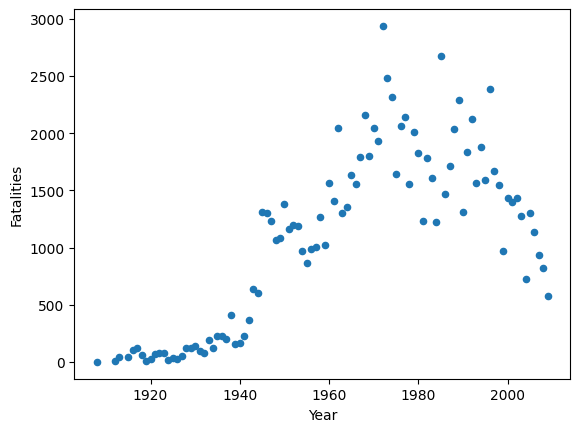

In [4]:
yearly_fatalities = airplane_df2.groupby(['Year'])['Fatalities'].sum().reset_index()
yearly_fatalities.corr()
yearly_fatalities.plot.scatter(x='Year', y='Fatalities')

This plot was set to see if there is any relationship between the year and the number of fatalities recorded. Based on this, it can be assumed that the number of fatalities increased until the 60's before it started to drop again. It can also be noticed that a drastic drop of the number of fatalities started during the 2000's.

*b. What is the average fatalities per decade?*

In [5]:
decade_list = []
for i in range(len(airplane_df.index)):
    decade = int(np.floor(airplane_df2.iloc[i]['Year']/10)*10) # get decade
    decade_list.append(decade)

airplane_df2 = airplane_df2.assign(Decade=decade_list)

decade_fatalities = airplane_df2.groupby(['Decade'])['Fatalities'].mean()
decade_fatalities.round(2)

Decade
1900     1.00
1910    15.08
1920     3.56
1930     5.78
1940    15.93
1950    18.56
1960    23.05
1970    25.24
1980    24.91
1990    21.78
2000    18.97
Name: Fatalities, dtype: float64

- Is there a relationship between the decade that the crash happened and the number of fatalities?

<AxesSubplot: xlabel='Decade'>

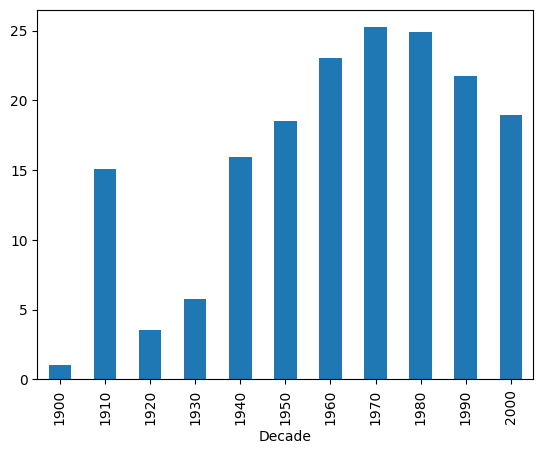

In [6]:
decade_fatalities.plot.bar(x='Decade', y='Fatalities')

There is a sudden jump of fatalities during the second decade. A possible cause for this is because air transportation has just been discovered, a lot of people were trying to innovate and build new machinery which would unfortunately fail. The number of fatalities drastically increased from the 30's to the 60's before it starts a downward trend. This may be due to the sudden rise in demand of air transportation. It was only during the recent years where the development for air transportation safety has picked up pace.

**2. What is the country with the most airplane crashes?**

In [7]:
#code here

*b. What is the country with the most aircraft related fatalities*

In [8]:
#code here

**3. What are the common causes of plane crashes?**

In [9]:
def to_lower_case(text_series):

    return text_series.str.lower()

In [10]:
airplane_df3 = airplane_df.copy()

In [11]:
airplane_df3['lower_summary'] = to_lower_case(airplane_df3['Summary'])
airplane_df3['lower_summary']

0       during a demonstration flight, a u.s. army fly...
1       first u.s. dirigible akron exploded just offsh...
2       the first fatal airplane accident in canada oc...
3       the airship flew into a thunderstorm and encou...
4       hydrogen gas which was being vented was sucked...
                              ...                        
5263    while on approach, the military transport cras...
5264    the cargo plane crashed while on approach to i...
5265    the airbus went missing over the atlantiocean ...
5266    the air ambulance crashed into hills while att...
5267    the military transport went missing while en r...
Name: lower_summary, Length: 5268, dtype: object

In [12]:
airplane_df3['lower_summary'].isna().sum()

390

In [13]:
# since the number of NaN is relatively insignificant compared to the number of entries we can drop them
airplane_df3.dropna()

,index,Date,Time,Location,Operator,Flight #,Route,Type,Registration,cn/In,Aboard,Fatalities,Ground,Summary,lower_summary
208,208,1930-01-19,18:23,"Oceanside, California",Maddux Airlines,7,"Aqua Caliente, Mexico - Los Angeles",Ford 5-AT-C Tri Motor,NC9689,5-AT-046,16.0,16.0,0.0,"While en route to Los Angeles, the pilot, flyi...","while en route to los angeles, the pilot, flyi..."
236,236,1931-03-31,10:45,"Bazaar, Kansas",Trans Continental and Western Air,599,Kansas City - Wichita - Los Angeles,Fokker F10A Trimotor,NC-999,1063,8.0,8.0,0.0,"Shortly after taking off from Kansas City, one...","shortly after taking off from kansas city, one..."
334,334,1934-08-31,23:42,"Amazonia, Missouri",Rapid Air Transport,6,Omaha - St. Joseph,Stinson SM-6000B,NC10809,5004,5.0,5.0,0.0,The plane crashed about 11 miles from St. Jose...,the plane crashed about 11 miles from st. jose...
354,354,1935-05-06,03:30,"Atlanta, Missouri",Trans Continental and Western Air,6,Los Angeles - Albuquerque - Kanasas City - Wa...,Douglas DC-2-112,NC13785,1295,14.0,5.0,0.0,The plane crashed while en route from Albuquer...,the plane crashed while en route from albuquer...
365,365,1935-08-14,23:45,"Near Gilmer, Texas",Delta Air Lines,4,Dallas - Atlanta,Stinson Model A,NC14599,9103,4.0,4.0,0.0,Crashed 3 miles south of Gilmer. The outboard ...,crashed 3 miles south of gilmer. the outboard ...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5248,5248,2009-02-12,22:17,"Clarence Center, New York",Continental Connection/Colgan Air,3407,"Newark, N.J. - Buffalo, NY",Bombardier DHC-8-402 Q400,N200WQ,4200,49.0,49.0,1.0,The commuter plane crashed while attemptiong t...,the commuter plane crashed while attemptiong t...
5251,5251,2009-02-25,10:31,"Amsterdam, Netherlands",Turkish Airlines,1951,"Istanbul, Turkey - Amsterdam, Netherlands",Boeing 737-8F2,TC-JGE,29789/1065,134.0,9.0,0.0,The plane was on final approach to Runway 18R ...,the plane was on final approach to runway 18r ...
5255,5255,2009-03-23,06:48,"Tokyo, Japan",FedEx,80,"Guangzhou, China - Tokyo, Japan",McDonnell Douglas MD-11,N526FE,48600/560,2.0,2.0,0.0,The cargo plane crashed and burst into flame a...,the cargo plane crashed and burst into flame a...
5259,5259,2009-04-17,10:30,"Mount Gergaji, Indonesia",Mimika Air,514,Ilaga - Mulia,Pilatus PC-6,PK-LTJ,959,11.0,11.0,0.0,The passenger plane crashed in poor weather in...,the passenger plane crashed in poor weather in...


In [70]:
def one_word (df_list):
    temp_list = df_list.copy()
    for i in range (len(temp_list)):
        if  "thunder" in str(temp_list[i]) or "weather" in str(temp_list[i]) or "storm" in str(temp_list[i]) or "wind" in str(temp_list[i]) or "rain" in str(temp_list[i]):
            temp_list[i] = 'weather'
        elif "shot down" in str(temp_list[i]):
            temp_list[i] = 'shot down'
        elif "engine failure" in str(temp_list[i]):
            temp_list[i] = 'engine failure'
        elif "shut down" in str(temp_list[i]) or "shut-down" in str(temp_list[i]):
            temp_list[i] = 'shut down'
        elif "pilot error" in str(temp_list[i]):
            temp_list[i] = 'pilot error'
        elif "mechanical" in str(temp_list[i]):
            temp_list[i] ='mechanical'
        elif "exploded" in str(temp_list[i]):
            temp_list[i] ='exploded'
        elif "missing" in str(temp_list[i]) or "disappeared" in str(temp_list[i]):
            temp_list[i] ='missing'
        elif "collision" in str(temp_list[i]):
            temp_list[i] ='collision'
        elif "stalled" in str(temp_list[i]):
            temp_list[i] ='stalled'
        elif "striking" in str(temp_list[i]):
            temp_list[i] ='striking'
        elif "crashed" in str(temp_list[i]):
            temp_list[i] ='crashed'
        else:
            temp_list[i] ='others'
        
    return temp_list

In [71]:
one_word_summary =one_word(airplane_df3['lower_summary'])
airplane_df3['one_word_summary'] = one_word_summary
airplane_df3.head()
#(airplane_df3['lower_summary']).iloc[1].replace(str([airplane_df3['lower_summary'].iloc[1]]),'exploded')

,index,Date,Time,Location,Operator,Flight #,Route,Type,Registration,cn/In,Aboard,Fatalities,Ground,Summary,lower_summary,one_word_summary
0,0,1908-09-17,17:18,"Fort Myer, Virginia",Military - U.S. Army,NaN,Demonstration,Wright Flyer III,NaN,1,2.0,1.0,0.0,"During a demonstration flight, a U.S. Army fly...","during a demonstration flight, a u.s. army fly...",others
1,1,1912-07-12,06:30,"AtlantiCity, New Jersey",Military - U.S. Navy,NaN,Test flight,Dirigible,NaN,NaN,5.0,5.0,0.0,First U.S. dirigible Akron exploded just offsh...,first u.s. dirigible akron exploded just offsh...,exploded
2,2,1913-08-06,NaN,"Victoria, British Columbia, Canada",Private,-,NaN,Curtiss seaplane,NaN,NaN,1.0,1.0,0.0,The first fatal airplane accident in Canada oc...,the first fatal airplane accident in canada oc...,weather
3,3,1913-09-09,18:30,Over the North Sea,Military - German Navy,NaN,NaN,Zeppelin L-1 (airship),NaN,NaN,20.0,14.0,0.0,The airship flew into a thunderstorm and encou...,the airship flew into a thunderstorm and encou...,weather
4,4,1913-10-17,10:30,"Near Johannisthal, Germany",Military - German Navy,NaN,NaN,Zeppelin L-2 (airship),NaN,NaN,30.0,30.0,0.0,Hydrogen gas which was being vented was sucked...,hydrogen gas which was being vented was sucked...,others


In [72]:
airplane_df3['one_word_summary'].value_counts()

crashed           1878
others            1325
weather           1276
engine failure     151
stalled            137
shot down          129
collision          101
missing             96
exploded            69
pilot error         51
striking            24
shut down           16
mechanical          15
Name: one_word_summary, dtype: int64

Text(0.5, 0, 'Crashes')

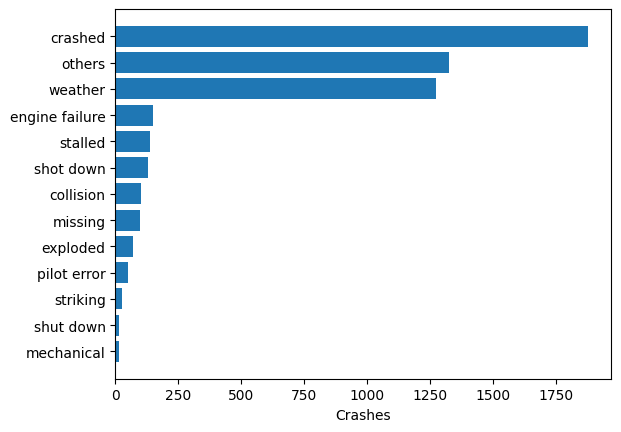

In [74]:
causes = airplane_df3.groupby(['one_word_summary']).count().sort_values('index')
x=np.array(causes.index)
y=np.array(causes['index'])
plt.barh(x[:20],y[:20])
plt.xlabel('Crashes')

# Research Question
Come up with one (1) research question to answer using the dataset. Here are some
requirements:

* The research question should arise from the exploratory data analysis. There should be an explanation regarding the connection of the research question to the answers obtained from performing exploratory data analysis.
* The research question should be within the scope of the dataset.
* The research question should be answerable by either performing data mining techniques or any domain-specific data modelling technique (i.e., techniques in modelling text, timeseries, graph, or image data) taught in class.
* Make sure to indicate the importance and significance of the research question